In [65]:
from textblob import TextBlob
import codecs
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pandas_datareader import data as web
import datetime
import numpy as np

In [66]:
#STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS
df = pd.read_excel("clean_tweet_data_master.xlsx")
#ata
x=df["cleaned_text"]
for i in x:
    #print(i)
    blob=TextBlob(i)
    print(blob.sentiment)





Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.41666666666666663)
Sentiment(polarity=-0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.2722222222222222)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.31666666666666665, subjectivity=0.5499999999999999)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09848484848484848, subjectivity=0.5833333333333333)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.275, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.

Sentiment(polarity=-0.1714285714285714, subjectivity=0.5119047619047619)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09791666666666668, subjectivity=0.5041666666666667)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.13333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05555555555555555, subjectivity=0.2777777777777778)
Sentiment(polarity=0.1119047619047619, subjectivity=0.2119047619047619)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1125, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3375, subjectivity=0.35520833333333335)
Sentiment(polarity=-1.0, subjectivity=1.0)
Se

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0027777777777777493, subjectivity=0.8277777777777778)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.04545454545454545, subjectivity=0.15151515151515152)
Sentiment(polarity=0.4, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.5694444444444444)
Sentiment(polarity=-0.14285714285714285, subjectivity=0.43571428571428567)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22222222222222224, subjectivity=0.49444444444444446)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.06666666666666667, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.454545454

Sentiment(polarity=-0.375, subjectivity=0.625)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(polarity=0.75, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14285714285714285, subjectivity=0.5952380952380952)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.25)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(pol

In [67]:
df['polarity'] = 0.0000
df['sentiment_confidence'] = 0.0000

for index,row in df.iterrows():
    analysis = TextBlob(df['cleaned_text'][index])
    sentiment, confidence = analysis.sentiment
    df.at[index,'polarity'] = sentiment
    df.at[index,'sentiment_confidence'] = confidence
    
#df

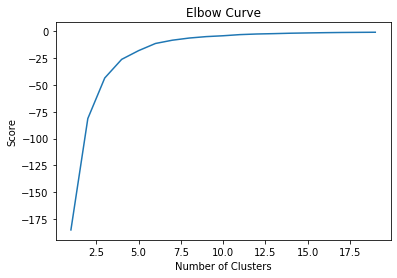

In [68]:
# Unsupervised Sentiment Analysis
X = df[['polarity']]

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [69]:
# The "elbow" is indicated at 5. The number of clusters chosen should therefore be 5.

In [70]:
#Standardize
dfold = df
df_tr = df
clmns = ['polarity', 'sentiment_confidence']

df_tr_std= stats.zscore(df_tr[clmns])

In [71]:
#Clustering
#K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters.
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [72]:
#Glue back to original data
df_tr['clusters']=labels
dfold['clusters']=labels

clmns.extend(['clusters'])

print(df_tr[clmns].groupby(['clusters']).mean())

          polarity  sentiment_confidence
clusters                                
0         0.199511              0.490677
1         0.007365              0.026953
2        -0.528890              0.797242
3        -0.106882              0.396022
4         0.604242              0.634962


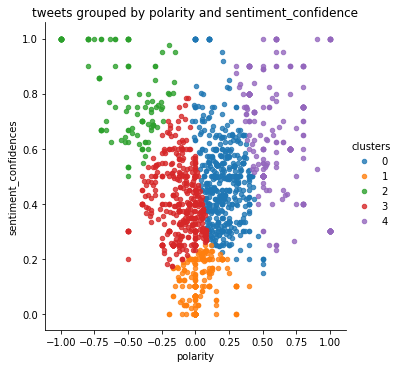

In [73]:
# Scatter plot of polarity and confidence
sns.lmplot('polarity', 'sentiment_confidence',
           data=df_tr,
           fit_reg=False,
           hue="clusters",
           scatter_kws={"marker": "D",
                        "s": 20})

plt.title('tweets grouped by polarity and sentiment_confidence')
plt.xlabel('polarity')
plt.ylabel('sentiment_confidences')
plt.show()

#### From the scattered plot we can interprete that dense cluster lies between -0.25 to +0.25. Cluster above +0.50 polarity implies positive sentiments and -0.50 polarity implies negative sentiment. It is clear from figure that sentiment is more inclined toward positive sentiment.

In [74]:
# Using Vader Sentiment
cdata=df[['date','cleaned_text']]
cdata

,date,cleaned_text
0,2020-03-30,liquid shall never freez ice stockmarket close...
1,2020-03-30,nasdaq djia spx spi nasdaq djia stock stockmar...
2,2020-03-30,stockmarket detach econom realiti
3,2020-03-30,stockmarket well
4,2020-03-30,import messag top saudi economist privat secto...
...,...,...
2441,2019-12-31,lundin gold inc top pick stockchas stock finan...
2442,2019-12-31,ramp ecuador lundin gold inc stock financ stoc...
2443,2019-12-31,turquois hill resourc top pick stockchas stock...
2444,2019-12-31,free trial readi green check newest featur bes...


In [75]:
#Creating a dataframe where we will combine the tweets date wise and store int
ccdata=pd.DataFrame(columns=['date','cleaned_text'])


In [76]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.date.iloc[i]
    next_date=cdata.date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.cleaned_text.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'date',get_date)
        ccdata.set_value(indx,'cleaned_text',get_tweet)
        indx=indx+1
        get_tweet=" "

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [77]:
ccdata 
#All the tweets has been clubbed as per their date

,date,cleaned_text
0,2020-03-30,liquid shall never freez ice stockmarket close...
1,2020-03-29,economist chart given world coronaviru china ...
2,2020-03-28,good exampl prep correctli took book good tra...
3,2020-03-27,week spx comp dow stock stockmarket investor ...
4,2020-03-26,bear bullmarket shortest ever amount time sto...
...,...,...
100,2020-01-05,repost via rightli said learn earn invest inv...
101,2020-01-04,hedg fund industri lag stupend ralli huge mar...
102,2020-01-03,track stockmarket reaction us airstrik kill s...
103,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...


In [78]:
ccdata = pd.read_excel('ccdata.xlsx')
#ccdata

In [79]:
read_stock_p=pd.read_excel('Dow.xlsx')

read_stock_p=read_stock_p[2:][['Attributes','Close']].rename(columns={"Attributes": "Date"}).reset_index(drop=True)
read_stock_p['Date']=read_stock_p['Date'].dt.strftime('%Y-%m-%d')
#read_stock_p=read_stock_p.set_index('Date')
read_stock_p

,Date,Close
0,2020-01-02,53.75
1,2020-01-03,52.42
2,2020-01-06,52.21
3,2020-01-07,52.19
4,2020-01-08,52.73
...,...,...
57,2020-03-25,30.38
58,2020-03-26,29.68
59,2020-03-27,28.56
60,2020-03-30,28.65


In [80]:
#Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe
ccdata['Prices']=""

In [81]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.date.loc[i]
        get_stock_date=read_stock_p.Date.loc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [82]:
#Prices are fetched but some entires are blank as close price might not be available for that day due to some 
#reason (like holiday, etc.)
ccdata

,date,cleaned_text,Prices
0,2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53
1,2020-01-03,track stockmarket reaction us airstrik kill s...,52
2,2020-01-04,hedg fund industri lag stupend ralli huge mar...,
3,2020-01-05,translat blown debt bubbl economi collaps go ...,
4,2020-01-06,time price decis rh entri alreadi trigger tra...,52
...,...,...,...
84,2020-03-26,bear bullmarket shortest ever amount time sto...,29
85,2020-03-27,week spx comp dow stock stockmarket investor ...,28
86,2020-03-28,good exampl prep correctli took book good tra...,
87,2020-03-29,economist chart given world coronaviru china ...,


In [83]:
# Set date column as index
ccdata = ccdata.set_index('date')
ccdata

,cleaned_text,Prices
date,,
2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53
2020-01-03,track stockmarket reaction us airstrik kill s...,52
2020-01-04,hedg fund industri lag stupend ralli huge mar...,
2020-01-05,translat blown debt bubbl economi collaps go ...,
2020-01-06,time price decis rh entri alreadi trigger tra...,52
...,...,...
2020-03-26,bear bullmarket shortest ever amount time sto...,29
2020-03-27,week spx comp dow stock stockmarket investor ...,28
2020-03-28,good exampl prep correctli took book good tra...,


In [84]:
#Forward fill NaN values in the Prices Column
ccdata['Prices'] = ccdata['Prices'].replace('', np.NaN)
ccdata['Prices'] = ccdata['Prices'].fillna(method='ffill')
ccdata

,cleaned_text,Prices
date,,
2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53.0
2020-01-03,track stockmarket reaction us airstrik kill s...,52.0
2020-01-04,hedg fund industri lag stupend ralli huge mar...,52.0
2020-01-05,translat blown debt bubbl economi collaps go ...,52.0
2020-01-06,time price decis rh entri alreadi trigger tra...,52.0
...,...,...
2020-03-26,bear bullmarket shortest ever amount time sto...,29.0
2020-03-27,week spx comp dow stock stockmarket investor ...,28.0
2020-03-28,good exampl prep correctli took book good tra...,28.0


In [85]:
#Making "Prices" column as integer so mathematical operations could be performed easily
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [86]:
#Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. 
#Comp is "Compound" it will tell whether the statement is overall negative or positive. 
#If it has negative value then it is negative, if it has positive value then it is positive. 
#If it has value 0, then it is neutral

ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,cleaned_text,Prices,Comp,Negative,Neutral,Positive
date,,,,,,
2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53,,,,
2020-01-03,track stockmarket reaction us airstrik kill s...,52,,,,
2020-01-04,hedg fund industri lag stupend ralli huge mar...,52,,,,
2020-01-05,translat blown debt bubbl economi collaps go ...,52,,,,
2020-01-06,time price decis rh entri alreadi trigger tra...,52,,,,
...,...,...,...,...,...,...
2020-03-26,bear bullmarket shortest ever amount time sto...,29,,,,
2020-03-27,week spx comp dow stock stockmarket investor ...,28,,,,
2020-03-28,good exampl prep correctli took book good tra...,28,,,,


In [87]:
import nltk
#nltk.download('vader_lexicon')

In [88]:
#This part of the code is responsible for assigning the polarity for each statement. 
#That is how much positive, negative, neutral you statement is. And also assign the compound value that is 
#overall sentiment of the statement

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'cleaned_text'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)



C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [89]:
ccdata

,cleaned_text,Prices,Comp,Negative,Neutral,Positive
date,,,,,,
2020-01-02,rakesh jhunjhunwala check iifl secur keep min...,53,0.9231,0.054,0.804,0.143
2020-01-03,track stockmarket reaction us airstrik kill s...,52,0.7626,0.072,0.809,0.119
2020-01-04,hedg fund industri lag stupend ralli huge mar...,52,0.7433,0.09,0.796,0.114
2020-01-05,translat blown debt bubbl economi collaps go ...,52,-0.7184,0.143,0.857,0
2020-01-06,time price decis rh entri alreadi trigger tra...,52,0.9801,0.013,0.865,0.121
...,...,...,...,...,...,...
2020-03-26,bear bullmarket shortest ever amount time sto...,29,0.9538,0.079,0.818,0.104
2020-03-27,week spx comp dow stock stockmarket investor ...,28,0.5574,0.09,0.81,0.099
2020-03-28,good exampl prep correctli took book good tra...,28,0.9702,0.048,0.831,0.121


% of positive tweets=  76.40449438202246
% of negative tweets=  21.34831460674157
% of neutral tweets=  2.247191011235955


[]

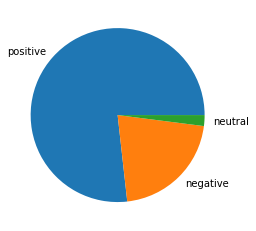

In [90]:
#Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same
import matplotlib.pyplot as plt
posi=0
nega=0
neut=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val==(0))):
        neut=neut+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
neuper=(neut/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neuper)
arr=np.asarray([posper,negper,neuper], dtype=int)
plt.pie(arr,labels=['positive','negative','neutral'])
plt.plot()


In [91]:
df_=ccdata[['Prices','Comp','Negative','Neutral','Positive']].copy()
df_

,Prices,Comp,Negative,Neutral,Positive
date,,,,,
2020-01-02,53,0.9231,0.054,0.804,0.143
2020-01-03,52,0.7626,0.072,0.809,0.119
2020-01-04,52,0.7433,0.09,0.796,0.114
2020-01-05,52,-0.7184,0.143,0.857,0
2020-01-06,52,0.9801,0.013,0.865,0.121
...,...,...,...,...,...
2020-03-26,29,0.9538,0.079,0.818,0.104
2020-03-27,28,0.5574,0.09,0.81,0.099
2020-03-28,28,0.9702,0.048,0.831,0.121


In [92]:
#split data
train_start_index = '2020-01-02'
train_end_index = '2020-02-15'
test_start_index = '2020-02-16'
test_end_index = '2020-03-30'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [93]:
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [94]:
print(numpy_df_train)

[[0.054 0.143]
 [0.072 0.119]
 [0.09  0.114]
 [0.143 0.   ]
 [0.013 0.121]
 [0.058 0.094]
 [0.073 0.098]
 [0.13  0.068]
 [0.048 0.119]
 [0.063 0.153]
 [0.    0.164]
 [0.111 0.13 ]
 [0.007 0.118]
 [0.028 0.157]
 [0.059 0.161]
 [0.099 0.169]
 [0.    0.   ]
 [0.    0.185]
 [0.037 0.105]
 [0.03  0.126]
 [0.008 0.08 ]
 [0.047 0.077]
 [0.082 0.155]
 [0.073 0.135]
 [0.021 0.036]
 [0.026 0.132]
 [0.049 0.119]
 [0.042 0.068]
 [0.062 0.155]
 [0.027 0.132]
 [0.125 0.077]
 [0.04  0.081]
 [0.061 0.17 ]
 [0.047 0.095]
 [0.059 0.104]
 [0.067 0.126]
 [0.068 0.154]
 [0.037 0.14 ]
 [0.089 0.134]
 [0.    0.127]
 [0.066 0.152]
 [0.022 0.186]
 [0.062 0.135]
 [0.    0.079]
 [0.    0.031]]


In [95]:
#Making a 2D array that will store the Negative and Positive sentiment for Testing dataset
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [96]:
print(numpy_df_test)

[[0.027 0.15 ]
 [0.032 0.09 ]
 [0.075 0.073]
 [0.014 0.122]
 [0.092 0.135]
 [0.021 0.124]
 [0.012 0.165]
 [0.03  0.096]
 [0.118 0.136]
 [0.123 0.111]
 [0.138 0.119]
 [0.136 0.118]
 [0.173 0.124]
 [0.147 0.073]
 [0.174 0.059]
 [0.111 0.127]
 [0.094 0.079]
 [0.134 0.156]
 [0.117 0.131]
 [0.105 0.122]
 [0.    0.   ]
 [0.065 0.121]
 [0.16  0.1  ]
 [0.124 0.117]
 [0.08  0.135]
 [0.191 0.091]
 [0.133 0.106]
 [0.13  0.116]
 [0.093 0.195]
 [0.142 0.094]
 [0.122 0.12 ]
 [0.158 0.121]
 [0.121 0.118]
 [0.13  0.098]
 [0.085 0.093]
 [0.116 0.148]
 [0.103 0.141]
 [0.086 0.116]
 [0.04  0.109]
 [0.079 0.104]
 [0.09  0.099]
 [0.048 0.121]
 [0.09  0.224]
 [0.071 0.107]]


In [97]:
#Making 2 dataframe for Training and Testing "Prices"
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

            Prices
date              
2020-01-02      53
2020-01-03      52
2020-01-04      52
2020-01-05      52
2020-01-06      52
2020-01-07      52
2020-01-08      52
2020-01-09      52
2020-01-10      51
2020-01-11      51
2020-01-12      51
2020-01-13      52
2020-01-14      52
2020-01-15      52
2020-01-16      52
2020-01-17      53
2020-01-18      53
2020-01-19      53
2020-01-20      53
2020-01-21      52
2020-01-22      50
2020-01-23      50
2020-01-24      48
2020-01-25      48
2020-01-26      48
2020-01-27      47
2020-01-28      47
2020-01-29      49
2020-01-30      48
2020-01-31      46
2020-02-01      46
2020-02-02      46
2020-02-03      46
2020-02-04      48
2020-02-05      49
2020-02-06      49
2020-02-07      48
2020-02-08      48
2020-02-09      48
2020-02-10      48
2020-02-11      48
2020-02-12      49
2020-02-13      48
2020-02-14      48
2020-02-15      48


In [98]:
print(y_test)

            Prices
date              
2020-02-16      48
2020-02-17      48
2020-02-18      47
2020-02-19      47
2020-02-20      48
2020-02-21      48
2020-02-22      48
2020-02-23      48
2020-02-24      46
2020-02-25      43
2020-02-26      43
2020-02-27      39
2020-02-28      40
2020-02-29      40
2020-03-01      40
2020-03-02      41
2020-03-03      40
2020-03-04      41
2020-03-05      40
2020-03-06      38
2020-03-07      38
2020-03-08      38
2020-03-09      30
2020-03-10      31
2020-03-11      27
2020-03-12      23
2020-03-13      25
2020-03-14      25
2020-03-15      25
2020-03-16      22
2020-03-17      26
2020-03-18      26
2020-03-19      28
2020-03-20      27
2020-03-21      27
2020-03-22      27
2020-03-23      26
2020-03-24      28
2020-03-25      30
2020-03-26      29
2020-03-27      28
2020-03-28      28
2020-03-29      28
2020-03-30      28


In [99]:
#Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value )
#!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Abhisha Burande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
prediction_train, bias, contributions = ti.predict(rf, numpy_df_train)

In [116]:
print(prediction_train)

[[51.8]
 [51.3]
 [51.5]
 [52.1]
 [51.2]
 [52. ]
 [51.4]
 [50.2]
 [49.1]
 [50.4]
 [51. ]
 [51.7]
 [52. ]
 [51.6]
 [50.6]
 [51.4]
 [52.5]
 [51.9]
 [52.7]
 [50.9]
 [48.8]
 [48.4]
 [48. ]
 [48.4]
 [49.4]
 [48.3]
 [47.5]
 [49.3]
 [48.9]
 [48. ]
 [47.8]
 [47.4]
 [47.1]
 [49.6]
 [50.3]
 [49.6]
 [48.3]
 [49.8]
 [48.9]
 [50.1]
 [48.9]
 [49.7]
 [48.1]
 [47.6]
 [49. ]]


In [102]:
idx_train=y_train.index
predictions_df_1 = pd.DataFrame(data=prediction[0:],index = idx_train,columns=['Prices'])

In [103]:
predictions_df_1

,Prices
date,
2020-01-02,51.8
2020-01-03,51.3
2020-01-04,51.5
2020-01-05,52.1
2020-01-06,51.2
2020-01-07,52.0
2020-01-08,51.4
2020-01-09,50.2
2020-01-10,49.1


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

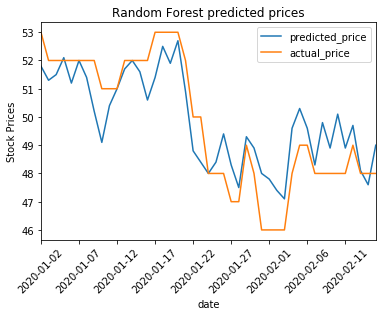

In [104]:
ax = predictions_df_1.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_train.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
plt.xticks(rotation=45)
#fig.savefig("random forest.png")

#### Training data is considered from january to mid-february. We noticed that our sentiment prediction is almost same as the stock market prediction. We see less fluctuation of sentiment prediction compared to stock market.

In [119]:
#Making Predictions
prediction_test, bias, contributions = ti.predict(rf, numpy_df_test)

In [120]:
print(prediction_test)

[[50.4]
 [50.6]
 [49.1]
 [51.2]
 [49.3]
 [50.9]
 [50.7]
 [50.5]
 [50.4]
 [50.3]
 [51. ]
 [51.5]
 [51.1]
 [49.6]
 [50.8]
 [51.7]
 [49.7]
 [49.4]
 [51.6]
 [51.8]
 [52.5]
 [49.9]
 [51.5]
 [50.3]
 [48. ]
 [51.4]
 [50.9]
 [50.9]
 [49.6]
 [51.4]
 [49.8]
 [51. ]
 [50.3]
 [50.8]
 [51. ]
 [50.5]
 [50.2]
 [51.2]
 [51.7]
 [50.8]
 [51.7]
 [49.1]
 [49.1]
 [51.2]]


In [107]:
#Defining index position for the test data. Making dataframe for the predicted value
#idx=np.arange(str(test_start_index),str(test_end_index)+1)
idx=y_test.index
predictions_df_ = pd.DataFrame(data=prediction[0:],index = idx,columns=['Prices'])

In [108]:
predictions_df_

,Prices
date,
2020-02-16,50.4
2020-02-17,50.6
2020-02-18,49.1
2020-02-19,51.2
2020-02-20,49.3
2020-02-21,50.9
2020-02-22,50.7
2020-02-23,50.5
2020-02-24,50.4


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

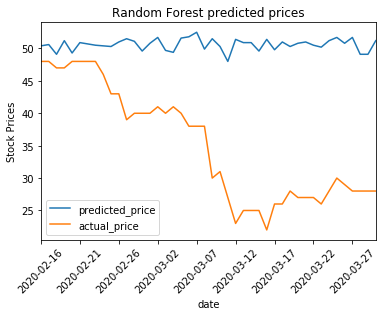

In [109]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
plt.xticks(rotation=45)
#fig.savefig("random forest.png")

#### Testing data is considered from mid-february to end of march. Initially stock market prediction and sentiment prediction were almost close enough. But after that stock market dropped drastically because of COVID-19 cases.But our sentiment prediction from training data predicted the market will remain steady but it contradicted to our prediction 

In [122]:
# Performance metrics for Random Forest Regressor
# For test data
errors = abs(prediction_test- y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
mape

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Mean absolute error: Prices    15.53
dtype: float64 degrees.
Accuracy: Prices    46.54
dtype: float64 %.


In [123]:
# For train data
errors = abs(prediction_train - y_train)
print('Metrics for Random Forest Trained on Expanded Data')
print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
mape

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Expanded Data
Mean absolute error: Prices    0.9
dtype: float64 degrees.
Accuracy: Prices    98.17
dtype: float64 %.


#### Conclusion:Mean Absolute error for testing data is 15.53 and for training data mean absolute error is 0.9. Here for testing data MAE is comparetively high which means average magnitude of the errors in a set of predictions is high. 